In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed, f_mode
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [5]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 165 #in second 600
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.5 #euro/km
params.platforms.comm_rate = 0.25
params.platforms.base_fare = 2
params.platforms.fare = 1.2 

params.platforms.min_fare = 5
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.dynamic_paricing = 'On'
params.zoning_level = 7
params.seed = 1

params.nP = 10000
params.nV = 500
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [6]:
params.nV = 500
params.seed = 1
sim500_1 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

10-11-22 13:04:51-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
10-11-22 13:05:13-INFO--------------------	Starting simulation	-------------------
10-11-22 13:05:24-WARNING-pax  254  got rejected by vehicle 2                1900-01-01 08:01:00
10-11-22 13:05:24-WARNING-pax 9537  got rejected by vehicle 3                1900-01-01 08:01:00
10-11-22 13:05:25-WARNING-pax 3719  got rejected by vehicle 26               1900-01-01 08:01:00
10-11-22 13:08:11-WARNING-pax 8288  got rejected by vehicle 446              1900-01-01 08:02:00
10-11-22 13:08:22-WARNING-pax 2181  got rejected by vehicle 115              1900-01-01 08:03:00
10-11-22 13:08:23-WARNING-pax 2259  got rejected by vehicle 96               1900-01-01 08:03:00
10-11-22 13:08:26-WARNING-pax 3061  got rejected by vehicle 475              1900-01-01 08:03:00
10-11-22 13:08:35-WARNING-pax 7496  got rejected by vehicle 401              1900-01-01 08:03:00
10-

In [7]:
sim500_1.concat_sdf.to_csv('max5001.csv')

In [8]:
params.nV = 500
params.seed = 2
sim500_2 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

10-11-22 14:51:08-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
10-11-22 14:51:23-INFO--------------------	Starting simulation	-------------------
10-11-22 14:51:30-WARNING-pax 4190  got rejected by vehicle 11               1900-01-01 08:01:00
10-11-22 14:51:31-WARNING-pax 3624  got rejected by vehicle 25               1900-01-01 08:01:00
10-11-22 14:51:31-WARNING-pax 1832  got rejected by vehicle 27               1900-01-01 08:01:00
10-11-22 14:51:31-WARNING-pax 4225  got rejected by vehicle 33               1900-01-01 08:01:00
10-11-22 14:51:31-WARNING-pax 3497  got rejected by vehicle 34               1900-01-01 08:01:00
10-11-22 14:53:10-WARNING-pax 5408  got rejected by vehicle 274              1900-01-01 08:02:00
10-11-22 14:53:13-WARNING-pax 6479  got rejected by vehicle 77               1900-01-01 08:02:00
10-11-22 14:53:16-WARNING-pax 9861  got rejected by vehicle 491              1900-01-01 08:02:00
10-

In [9]:
params.nV = 500
params.seed = 3
sim500_3 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

10-11-22 16:22:03-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
10-11-22 16:22:17-INFO--------------------	Starting simulation	-------------------
10-11-22 16:22:25-WARNING-pax 4325  got rejected by vehicle 7                1900-01-01 08:01:00
10-11-22 16:22:25-WARNING-pax 8257  got rejected by vehicle 8                1900-01-01 08:01:00
10-11-22 16:22:25-WARNING-pax 5214  got rejected by vehicle 15               1900-01-01 08:01:00
10-11-22 16:22:25-WARNING-pax 6208  got rejected by vehicle 16               1900-01-01 08:01:00
10-11-22 16:22:25-WARNING-pax 9873  got rejected by vehicle 20               1900-01-01 08:01:00
10-11-22 16:24:08-WARNING-pax 4872  got rejected by vehicle 145              1900-01-01 08:02:00
10-11-22 16:24:09-WARNING-pax 5740  got rejected by vehicle 52               1900-01-01 08:02:00
10-11-22 16:24:09-WARNING-pax 6067  got rejected by vehicle 352              1900-01-01 08:02:00
10-

In [10]:
params.nV = 500
params.seed = 4
sim500_4 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

10-11-22 17:52:38-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
10-11-22 17:52:53-INFO--------------------	Starting simulation	-------------------
10-11-22 17:53:01-WARNING-pax 6117  got rejected by vehicle 21               1900-01-01 08:01:00
10-11-22 17:54:33-WARNING-pax 6117  got rejected by vehicle 315              1900-01-01 08:01:30
10-11-22 17:54:39-WARNING-pax 5755  got rejected by vehicle 67               1900-01-01 08:02:00
10-11-22 17:54:42-WARNING-pax 8249  got rejected by vehicle 48               1900-01-01 08:02:00
10-11-22 17:54:43-WARNING-pax 8833  got rejected by vehicle 155              1900-01-01 08:02:00
10-11-22 17:54:49-WARNING-pax 2377  got rejected by vehicle 139              1900-01-01 08:03:00
10-11-22 17:54:51-WARNING-pax 3736  got rejected by vehicle 112              1900-01-01 08:03:00
10-11-22 17:54:52-WARNING-pax 4726  got rejected by vehicle 290              1900-01-01 08:03:00
10-

In [11]:
params.nV = 500
params.seed = 5
sim500_5 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

10-11-22 19:31:41-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 500 vehicles and 10000 passengers in Amsterdam, Netherlands
10-11-22 19:32:02-INFO--------------------	Starting simulation	-------------------
10-11-22 19:32:10-WARNING-pax 2628  got rejected by vehicle 2                1900-01-01 08:01:00
10-11-22 19:32:10-WARNING-pax 8352  got rejected by vehicle 4                1900-01-01 08:01:00
10-11-22 19:32:10-WARNING-pax 3093  got rejected by vehicle 9                1900-01-01 08:01:00
10-11-22 19:33:53-WARNING-pax 5970  got rejected by vehicle 155              1900-01-01 08:02:00
10-11-22 19:33:54-WARNING-pax 8901  got rejected by vehicle 127              1900-01-01 08:02:00
10-11-22 19:33:59-WARNING-pax 1455  got rejected by vehicle 361              1900-01-01 08:03:00
10-11-22 19:34:02-WARNING-pax 6014  got rejected by vehicle 115              1900-01-01 08:03:00
10-11-22 19:34:02-WARNING-pax 6808  got rejected by vehicle 49               1900-01-01 08:03:00
10-

In [12]:
# make max_ds_dfl7.csv' with 5 replications
sims = [sim500_1, sim500_2, sim500_3, sim500_4, sim500_5]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_500.csv')
# df.to_csv('max_ds_dfl7.csv')
df

2.1103030303030303


sim1  sim2  sim3      sim4  sim5   ave_max
hex_address                                                
871968240ffffff   1.0   0.0   1.0  1.000000   0.0  0.600000
871968241ffffff   1.0   1.0   1.0  3.000000   1.0  1.400000
871968244ffffff   1.0   1.0   1.0  0.333333   1.0  0.866667
871968245ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871968248ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871968249ffffff   1.0   2.0   2.0  2.000000   2.0  1.800000
87196824cffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
87196824dffffff   2.0   2.0   1.0  4.000000   2.0  2.200000
871968263ffffff   0.0   0.0   0.0  0.000000   0.0  0.000000
871968268ffffff   2.0   1.0   1.0  1.000000   1.0  1.200000
871968269ffffff   1.0   1.0   1.0  8.000000   2.0  2.600000
87196826affffff   1.0   1.0   1.0  1.000000   1.0  1.000000
87196826bffffff   3.0   2.0   3.0  7.000000   5.0  4.000000
87196826cffffff   1.0   1.0   0.0  1.000000   1.0  0.800000
87196826dffffff   3.0   2.0   1.0  2.000000   1.0  1.800000
87196826effffff   1.0   1.0   0.0  1.000000   0.0  0.600000
871969504ffffff   1.0   3.0   1.0  3.000000   4.0  2.400000
871969506ffffff   1.0   1.0   2.0  1.000000   1.0  1.200000
871969514ffffff   1.0   1.0   1.0  2.000000   1.0  1.200000
871969520ffffff   3.0   2.0   2.0  2.000000   5.0  2.800000
871969521ffffff   1.0   2.0   2.0  2.000000   4.0  2.200000
871969522ffffff   3.0   5.0   2.0  5.000000   5.0  4.000000
871969523ffffff   1.0   1.0   1.0  1.000000   2.0  1.200000
871969524ffffff   4.0   6.0   5.0  4.000000   8.0  5.400000
871969525ffffff   1.0   1.0   1.0  3.000000   3.0  1.800000
871969526ffffff   4.0   3.0   4.0  3.000000   7.0  4.200000
871969530ffffff   4.0   3.0   4.0  7.000000  12.0  6.000000
871969531ffffff   3.0   2.0   2.0  4.000000   5.0  3.200000
871969532ffffff   3.0   2.0   2.0  5.000000   5.0  3.400000
871969533ffffff   1.0   1.0   2.0  1.000000   4.0  1.800000
871969534ffffff   8.0   4.0   4.0  6.000000   6.0  5.600000
871969535ffffff   6.0   7.0   3.0  9.000000   5.0  6.000000
871969536ffffff   6.0   3.0   4.0  7.000000   7.0  5.400000
871969c81ffffff   0.0   1.0   1.0  0.000000   1.0  0.600000
871969c83ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c88ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c89ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c8affffff   3.0   1.0   1.0  3.000000   4.0  2.400000
871969c8bffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c8cffffff   0.0   1.0   1.0  1.000000   0.0  0.600000
871969c8dffffff   0.0   1.0   0.0  1.000000   0.0  0.400000
871969c8effffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c91ffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969c93ffffff   1.0   1.0   1.0  1.000000   2.0  1.200000
871969c98ffffff   3.0   4.0   2.0  2.000000   3.0  2.800000
871969c99ffffff   2.0   2.0   2.0  2.000000   5.0  2.600000
871969c9affffff   4.0   3.0   1.0  6.000000   8.0  4.400000
871969c9bffffff  16.0   4.0   5.0  8.000000   6.0  7.800000
871969c9cffffff   1.0   1.0   2.0  5.000000   3.0  2.400000
871969c9dffffff   2.0   2.0   2.0  4.000000   3.0  2.600000
871969c9effffff   1.0   1.0   1.0  2.000000   3.0  1.600000
871969cabffffff   1.0   1.0   1.0  1.000000   1.0  1.000000
871969cd0ffffff   0.0   0.0   0.0  0.000000   0.0  0.000000
871969cd2ffffff   0.0   0.0   0.0  0.000000   0.0  0.000000
871969cd6ffffff   0.0   0.0   0.0  0.000000   0.0  0.000000

In [19]:
df = pd.read_csv('max_ds_100.csv')
df.ave_max.max()

23.8

In [19]:
sim100_5

pax_id      origin destination                treq tdep           ttrav  \
id                                                                              
1        606    46270368  2054127647 1900-01-01 08:01:00  NaN 0 days 00:07:53   
2        818    46330935   271391419 1900-01-01 08:01:00  NaN 0 days 00:05:35   
3       2628    46278428    46306779 1900-01-01 08:01:00  NaN 0 days 00:13:39   
4       2842    46330935   271391419 1900-01-01 08:01:00  NaN 0 days 00:05:35   
5       3093    46427821  7985932402 1900-01-01 08:01:00  NaN 0 days 00:05:51   
...      ...         ...         ...                 ...  ...             ...   
9996    6581  1029673115    46434464 1900-01-01 15:59:00  NaN 0 days 00:07:38   
9997    7195  1978350904  5420808500 1900-01-01 15:59:00  NaN 0 days 00:17:47   
9998    7903    46552687  3773775376 1900-01-01 15:59:00  NaN 0 days 00:10:14   
9999    8347  1978342141  2793812662 1900-01-01 15:59:00  NaN 0 days 00:05:00   
10000   9515  3295383123    46377676 1900-01-01 15:59:00  NaN 0 days 00:06:30   

                     tarr tdrop shareable schedule_id   dist ride_id position  \
id                                                                              
1     1900-01-01 08:08:53   NaN     False         NaN   4735     606        0   
2     1900-01-01 08:06:35   NaN     False         NaN   3356     818        0   
3     1900-01-01 08:14:39   NaN     False         NaN   8193    2628        0   
4     1900-01-01 08:06:35   NaN     False         NaN   3356    2842        0   
5     1900-01-01 08:06:51   NaN     False         NaN   3517    3093        0   
...                   ...   ...       ...         ...    ...     ...      ...   
9996  1900-01-01 16:06:38   NaN     False         NaN   4588    6581        0   
9997  1900-01-01 16:16:47   NaN     False         NaN  10673    7195        0   
9998  1900-01-01 16:09:14   NaN     False         NaN   6142    7903        0   
9999  1900-01-01 16:04:00   NaN     False         NaN   3001    8347        0   
10000 1900-01-01 16:05:30   NaN     False         NaN   3907    9515        0   

                                            sim_schedule  
id                                                        
1                 node time  req_id    od
0          ...  
2                node time  req_id    od
0          N...  
3               node time  req_id    od
0         NaN...  
4                node time  req_id    od
0          N...  
5                 node time  req_id    od
0          ...  
...                                                  ...  
9996              node time  req_id    od
0          ...  
9997              node time  req_id    od
0          ...  
9998              node time  req_id    od
0          ...  
9999              node time  req_id    od
0          ...  
10000             node time  req_id    od
0          ...  

[10000 rows x 14 columns]

In [62]:
# make max_ds_dfl7.csv' with 5 replications
sims = [sim100_1, sim100_2, sim100_3, sim100_4]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_100.csv')
# df.to_csv('max_ds_dfl7.csv')
df

6.663636363636364


sim1  sim2  sim3  sim4  ave_max
hex_address                                     
871968240ffffff   2.0   0.0   1.0   1.0     1.00
871968241ffffff   2.0   3.0   3.0   3.0     2.75
871968244ffffff   2.0   4.0   2.0   1.0     2.25
871968245ffffff   1.0   1.0   1.0   2.0     1.25
871968248ffffff   2.0   2.0   3.0   3.0     2.50
871968249ffffff   6.0   5.0   5.0   7.0     5.75
87196824cffffff   3.0   4.0   3.0   4.0     3.50
87196824dffffff   7.0   7.0   9.0  11.0     8.50
871968263ffffff   0.0   0.0   0.0   0.0     0.00
871968268ffffff   4.0   2.0   4.0   3.0     3.25
871968269ffffff  12.0  11.0  12.0  11.0    11.50
87196826affffff   3.0   2.0   2.0   3.0     2.50
87196826bffffff  13.0  10.0  11.0  11.0    11.25
87196826cffffff   2.0   2.0   0.0   1.0     1.25
87196826dffffff   5.0   5.0   4.0   5.0     4.75
87196826effffff   1.0   1.0   0.0   1.0     0.75
871969504ffffff   8.0   9.0  12.0   6.0     8.75
871969506ffffff   4.0   3.0   4.0   3.0     3.50
871969514ffffff   2.0   3.0   2.0   2.0     2.25
871969520ffffff  11.0  11.0  10.0  14.0    11.50
871969521ffffff   9.0   8.0   9.0   9.0     8.75
871969522ffffff  16.0  17.0  20.0  17.0    17.50
871969523ffffff   5.0   4.0   4.0   5.0     4.50
871969524ffffff  17.0  14.0  14.0  15.0    15.00
871969525ffffff   8.0   8.0   6.0   8.0     7.50
871969526ffffff  25.0  16.0  17.0  16.0    18.50
871969530ffffff  19.0  16.0  16.0  18.0    17.25
871969531ffffff   9.0  10.0   9.0  10.0     9.50
871969532ffffff  13.0  12.0  16.0  15.0    14.00
871969533ffffff   5.0   2.0   3.0   4.0     3.50
871969534ffffff  26.0  24.0  24.0  23.0    24.25
871969535ffffff  19.0  21.0  18.0  19.0    19.25
871969536ffffff  14.0  16.0  15.0  12.0    14.25
871969c81ffffff   0.0   1.0   1.0   0.0     0.50
871969c83ffffff   4.0   4.0   3.0   2.0     3.25
871969c88ffffff   2.0   2.0   2.0   2.0     2.00
871969c89ffffff   2.0   1.0   1.0   1.0     1.25
871969c8affffff   7.0   8.0   7.0   7.0     7.25
871969c8bffffff   2.0   2.0   4.0   3.0     2.75
871969c8cffffff   0.0   1.0   1.0   1.0     0.75
871969c8dffffff   0.0   1.0   0.0   1.0     0.50
871969c8effffff   2.0   1.0   1.0   1.0     1.25
871969c91ffffff   5.0   5.0   6.0   4.0     5.00
871969c93ffffff   2.0   3.0   4.0   2.0     2.75
871969c98ffffff  13.0   8.0  10.0   6.0     9.25
871969c99ffffff   8.0   9.0   9.0   9.0     8.75
871969c9affffff  12.0  11.0   9.0  11.0    10.75
871969c9bffffff  21.0  17.0  18.0  24.0    20.00
871969c9cffffff   8.0  10.0  10.0   8.0     9.00
871969c9dffffff  11.0  11.0  13.0  11.0    11.50
871969c9effffff   6.0   6.0   6.0   7.0     6.25
871969cabffffff   1.0   1.0   1.0   2.0     1.25
871969cd0ffffff   0.0   0.0   0.0   0.0     0.00
871969cd2ffffff   0.0   0.0   0.0   0.0     0.00
871969cd6ffffff   0.0   0.0   0.0   0.0     0.00

In [203]:
simlist = [sim100, sim200, sim300, sim400, sim500]
df = pd.DataFrame(columns=['simulation','surge_1', 'surge_1_2', 'surge_2_3', 'surge_3_4',
                           'surge_4_5'])
for sim in simlist:
    
    l1 = []; l2=[]; l3=[]; l4=[]; l5=[]
    for v in range(1, sim.params.nV+1):
        for s in sim.vehs[v].surge_mps.values():
            if s<=1:
                l1.append(s)
            elif s<=2:
                l2.append(s)
            elif s<=3:
                l3.append(s)
            elif s<=4:
                l4.append(s)
            elif s<=5:
                l5.append(s)

    t = len(l1) + len(l2)+ len(l3)+ len(l4)+ len(l5)
    new_row = {'surge_1':100*len(l1)/t, 'surge_1_2':100*len(l2)/t, 
               'surge_2_3':100*len(l3)/t, 'surge_3_4':100*len(l4)/t,
               'surge_4_5':100*len(l5)/t}
    df = df.append(new_row, ignore_index=True)
    
    # print('mp = 1 : ', 100*len(l1)/t, '%'); print('mp = 2 : ', 100*len(l2)/t, '%')
    # print('mp = 3 : ', 100*len(l3)/t, '%'); print('mp = 4 : ', 100*len(l4)/t, '%')
    # print('mp = 5 : ', 100*len(l5)/t, '%')
df.simulation = [100,200,300,400,500]
df

simulation    surge_1  surge_1_2  surge_2_3  surge_3_4  surge_4_5
0         100  29.978065  58.615647   9.748964   1.291738   0.365586
1         200  47.249509  45.551502   6.385069   0.687623   0.126298
2         300  75.077229  21.822595   2.791262   0.286849   0.022065
3         400  90.929566   8.251433   0.757576   0.051188   0.010238
4         500  98.927533   0.962213   0.050115   0.060138   0.000000

In [140]:
sim300.concat_sdf.groupby(['hex_address']).max()

cnt  demand  supply   D/S
hex_address                               
871968240ffffff   11       1       2   1.0
871968241ffffff   12       2       4   2.0
871968244ffffff   12       2       2   2.0
871968245ffffff   30       1       0   1.0
871968248ffffff   34       1       2   1.0
871968249ffffff  250       5       4   5.0
87196824cffffff   47       3       3   3.0
87196824dffffff  346       7      12   7.0
871968263ffffff    1       0       0   0.0
871968268ffffff   38       3       2   3.0
871968269ffffff  461      10      10  10.0
87196826affffff  122       1       2   1.0
87196826bffffff  562       9      12   9.0
87196826cffffff   35       1       2   1.0
87196826dffffff  129       4       9   4.0
87196826effffff   18       1       1   1.0
871969504ffffff  340       6      14   6.0
871969506ffffff  100       4       5   4.0
871969514ffffff   35       1       3   1.0
871969520ffffff  569      10      16  10.0
871969521ffffff  123       8      11   8.0
871969522ffffff  527      12      19  12.0
871969523ffffff   62       3       6   3.0
871969524ffffff  370      12      12  12.0
871969525ffffff  108       8      15   8.0
871969526ffffff  601      22      19  22.0
871969530ffffff  590      16      20  16.0
871969531ffffff  534       7      17   7.0
871969532ffffff  674       8      12   8.0
871969533ffffff   55       3       5   3.0
871969534ffffff  631      21      31  21.0
871969535ffffff  682      14      43  14.0
871969536ffffff  513      12      13  12.0
871969c81ffffff    2       0       1   0.0
871969c83ffffff   16       4       2   4.0
871969c88ffffff    9       2       1   2.0
871969c89ffffff    4       1       1   1.0
871969c8affffff  279       7       7   7.0
871969c8bffffff   82       2       4   2.0
871969c8cffffff    2       0       1   0.0
871969c8dffffff    4       0       1   0.0
871969c8effffff   20       1       2   1.0
871969c91ffffff   91       4       3   4.0
871969c93ffffff   59       2       4   2.0
871969c98ffffff  514       7      12   7.0
871969c99ffffff  256       5       8   5.0
871969c9affffff  311      11      12  11.0
871969c9bffffff  578      17      32  17.0
871969c9cffffff  214       8      17   8.0
871969c9dffffff  426       8      13   8.0
871969c9effffff  536       5       5   5.0
871969cabffffff    5       1       1   1.0
871969cd0ffffff   95       0       0   0.0
871969cd2ffffff   13       0       0   0.0
871969cd6ffffff  151       0       0   0.0

In [126]:
df = pd.read_csv('max_ds_dfl7.csv')
df

hex_address  sim1  sim2  sim3  sim4  sim5  ave_max
0   871968240ffffff   2.0   0.0   1.0   1.0   0.0      0.8
1   871968241ffffff   2.0   3.0   3.0   3.0   3.0      2.8
2   871968244ffffff   2.0   4.0   2.0   1.0   2.0      2.2
3   871968245ffffff   1.0   1.0   1.0   2.0   1.0      1.2
4   871968248ffffff   2.0   2.0   3.0   3.0   1.0      2.2
5   871968249ffffff   6.0   4.0   4.0   7.0   5.0      5.2
6   87196824cffffff   3.0   4.0   3.0   4.0   3.0      3.4
7   87196824dffffff   7.0   7.0   9.0   8.0   7.0      7.6
8   871968263ffffff   0.0   0.0   0.0   0.0   0.0      0.0
9   871968268ffffff   4.0   2.0   3.0   3.0   2.0      2.8
10  871968269ffffff  12.0  10.0  12.0  11.0   9.0     10.8
11  87196826affffff   2.0   2.0   2.0   3.0   2.0      2.2
12  87196826bffffff  14.0   9.0  11.0  11.0  12.0     11.4
13  87196826cffffff   2.0   2.0   0.0   1.0   1.0      1.2
14  87196826dffffff   4.0   5.0   4.0   5.0   5.0      4.6
15  87196826effffff   1.0   1.0   0.0   1.0   0.0      0.6
16  871969504ffffff   8.0   9.0   9.0   6.0   6.0      7.6
17  871969506ffffff   4.0   3.0   4.0   3.0   5.0      3.8
18  871969514ffffff   1.0   3.0   1.0   2.0   2.0      1.8
19  871969520ffffff  12.0   9.0   9.0  12.0   8.0     10.0
20  871969521ffffff   8.0   7.0   8.0   9.0   8.0      8.0
21  871969522ffffff  15.0  17.0  16.0  16.0  17.0     16.2
22  871969523ffffff   5.0   4.0   5.0   3.0   3.0      4.0
23  871969524ffffff  14.0  14.0  16.0  14.0  21.0     15.8
24  871969525ffffff   7.0   7.0   6.0   8.0   5.0      6.6
25  871969526ffffff  21.0  16.0  15.0  14.0  17.0     16.6
26  871969530ffffff  20.0  14.0  13.0  14.0  16.0     15.4
27  871969531ffffff   9.0  10.0   8.0  10.0  10.0      9.4
28  871969532ffffff  10.0  11.0  13.0  16.0  12.0     12.4
29  871969533ffffff   3.0   2.0   3.0   4.0   4.0      3.2
30  871969534ffffff  24.0  19.0  23.0  21.0  19.0     21.2
31  871969535ffffff  19.0  17.0  17.0  17.0  17.0     17.4
32  871969536ffffff  13.0  14.0  15.0  12.0  13.0     13.4
33  871969c81ffffff   0.0   1.0   1.0   0.0   1.0      0.6
34  871969c83ffffff   4.0   4.0   2.0   2.0   2.0      2.8
35  871969c88ffffff   2.0   2.0   2.0   2.0   1.0      1.8
36  871969c89ffffff   2.0   1.0   1.0   1.0   1.0      1.2
37  871969c8affffff   7.0   8.0   7.0   8.0   6.0      7.2
38  871969c8bffffff   2.0   2.0   4.0   3.0   2.0      2.6
39  871969c8cffffff   0.0   1.0   1.0   1.0   0.0      0.6
40  871969c8dffffff   0.0   1.0   0.0   1.0   0.0      0.4
41  871969c8effffff   1.0   1.0   1.0   1.0   1.0      1.0
42  871969c91ffffff   6.0   5.0   6.0   4.0   4.0      5.0
43  871969c93ffffff   2.0   3.0   4.0   2.0   5.0      3.2
44  871969c98ffffff   9.0   7.0   9.0   6.0   8.0      7.8
45  871969c99ffffff   9.0   9.0   8.0   8.0   9.0      8.6
46  871969c9affffff  11.0  11.0  10.0  11.0   9.0     10.4
47  871969c9bffffff  19.0  15.0  16.0  24.0  17.0     18.2
48  871969c9cffffff   8.0   9.0  10.0   8.0   8.0      8.6
49  871969c9dffffff  10.0  12.0  12.0  12.0  10.0     11.2
50  871969c9effffff   5.0   7.0   6.0   7.0  10.0      7.0
51  871969cabffffff   1.0   1.0   1.0   2.0   1.0      1.2
52  871969cd0ffffff   0.0   0.0   0.0   0.0   0.0      0.0
53  871969cd2ffffff   0.0   0.0   0.0   0.0   0.0      0.0
54  871969cd6ffffff   0.0   0.0   0.0   0.0   0.0      0.0

In [104]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

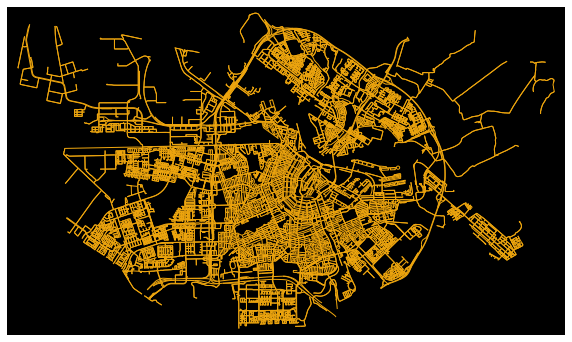

In [105]:
G = sim300.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

In [41]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

In [108]:
hex_address = ['871969526ffffff', '871969c9bffffff', '871969c8bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)